In [0]:
!git clone -b dev https://github.com/nyikovicsmate/thesis

Cloning into 'thesis'...
remote: Enumerating objects: 278, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 1697 (delta 167), reused 216 (delta 119), pack-reused 1419
Receiving objects: 100% (1697/1697), 199.11 MiB | 39.88 MiB/s, done.
Resolving deltas: 100% (656/656), done.


In [0]:
%cd thesis

/content/thesis


In [0]:
!pip3 install -q gdown
# bsd500_gray.zip
# !gdown https://drive.google.com/uc?id=1O2tduoLX1DdP3VoLkAQfuv5ssFxf8LPc
# !unzip -q bsd500_gray.zip
# bsd500_color.zip
!gdown https://drive.google.com/uc?id=1buG1ziqMjy18gnpkuQjqk81XrLsGjT7p
!unzip -q bsd500_color.zip
# set14_color.zip
!gdown https://drive.google.com/uc?id=1OiDs7jRm3NZCY6ghjyE12G5hVS0fG4EM
!unzip -q set14_color.zip

Downloading...
From: https://drive.google.com/uc?id=1buG1ziqMjy18gnpkuQjqk81XrLsGjT7p
To: /content/thesis/bsd500_color.zip
29.4MB [00:00, 57.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OiDs7jRm3NZCY6ghjyE12G5hVS0fG4EM
To: /content/thesis/set14_color.zip
100% 831k/831k [00:00<00:00, 97.1MB/s]


In [0]:
%tensorflow_version 2.x
from src.callbacks import *
from src.dataset import *
import numpy as np
import tensorflow as tf

from src.networks.adversarial.iterative_sampling_network import AdversarialIterativeSamplingNetwork

In [0]:
seed = 1111

normalize = lambda x: np.asarray(x / 255.0, dtype=np.float32)
downsample = lambda x: np.array([cv2.resize(x_i, (x.shape[2]//2, x.shape[1]//2), interpolation=cv2.INTER_CUBIC) for x_i in x])

ds = HDFDataset("bsd500_70_70_color.h5").shuffle(seed).transform()
ds_g_hr = ds.batch(50).map(normalize)
ds_g_lr = ds.batch(50).map(downsample).map(normalize)
ds_d_hr = ds.batch(50).map(normalize)
ds_d_lr = ds.batch(50).map(downsample).map(normalize)

# cb_g = [TrainingCheckpointCallback(appendix="_ad_iter", save_freq=10),
#        ExponentialDecayCallback(learning_rate, epochs, decay_rate=0.9)]
# cb_d = [TrainingCheckpointCallback(appendix="_ad_iter", save_freq=10),
#        ExponentialDecayCallback(learning_rate, epochs, decay_rate=0.9)]

In [0]:
network = AdversarialIterativeSamplingNetwork((None, None, 3))
network.train(ds_g_lr, ds_g_hr,
              ds_d_lr, ds_d_hr,
              generator_epochs=1800,
              discriminator_epochs=1200,
              alternating_ratio=20,
              generator_lr=1e-6,
              discriminator_lr=1e-6,
              generator_callbacks=[],
              discriminator_callbacks=[])

[2020-05-21 09:13:05,201] INFO load_state(): Loaded state with: 
Train time: 05h:50m:02s
Epochs:     2000
Loss:       7456.5151
[2020-05-21 09:13:05,225] INFO load_state(): Loaded state with: 
Train time: 00h:03m:53s
Epochs:     148
Loss:       0.4277
[2020-05-21 09:13:05,226] INFO train(): Training discriminator network.
[2020-05-21 09:13:08,214] INFO _train(): Epoch: 0 train_loss: 252.14
[2020-05-21 09:13:09,693] INFO _train(): Epoch: 1 train_loss: 256.07
[2020-05-21 09:13:11,184] INFO _train(): Epoch: 2 train_loss: 292.36
[2020-05-21 09:13:12,662] INFO _train(): Epoch: 3 train_loss: 209.44
[2020-05-21 09:13:14,156] INFO _train(): Epoch: 4 train_loss: 189.52
[2020-05-21 09:13:15,632] INFO _train(): Epoch: 5 train_loss: 310.29
[2020-05-21 09:13:17,107] INFO _train(): Epoch: 6 train_loss: 182.96
[2020-05-21 09:13:18,582] INFO _train(): Epoch: 7 train_loss: 221.70
[2020-05-21 09:13:20,068] INFO _train(): Epoch: 8 train_loss: 238.81
[2020-05-21 09:13:21,542] INFO _train(): Epoch: 9 train

[2020-05-21 11:17:05,650] WARNING save_state(): Model directory /content/thesis/checkpoints/iterativesamplingnetwork_ad_iter does not exist. Creating it.
[2020-05-21 11:17:05,715] INFO save_state(): Saved state.
[2020-05-21 11:17:05,716] WARNING save_state(): Model directory /content/thesis/checkpoints/discriminatornetwork_ad_iter does not exist. Creating it.
[2020-05-21 11:17:05,747] INFO save_state(): Saved state.
[2020-05-21 11:17:05,802] INFO load_state(): Loaded state with: 
Train time: 07h:15m:30s
Epochs:     3800
Loss:       2819.8342
[2020-05-21 11:17:05,825] INFO load_state(): Loaded state with: 
Train time: 00h:33m:03s
Epochs:     1348
Loss:       58.8564
[2020-05-21 11:17:06,518] INFO _predict(): Predicted images with shape: (14, 70, 70, 3)
   HR   ALIASED   NETWORK   


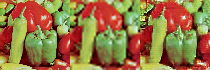

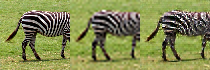

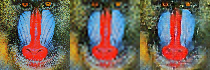

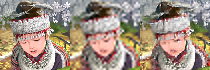

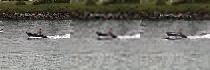

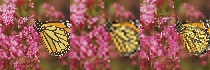

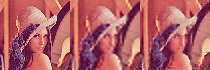

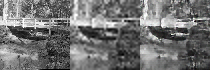

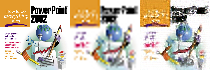

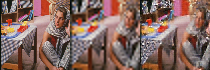

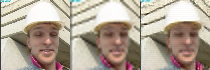

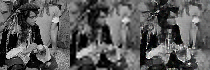

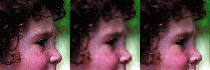

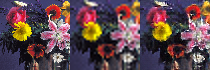

SSIM
max: [10] 0.86    min: [2] 0.54    avg: 0.65
TOTAL_VARIATION
max: [8] 2986.21    min: [12] 922.20    avg: 2141.55
PSNR
max: [12] 26.87    min: [8] 14.40    avg: 19.53
MEAN_SQUARED_ERROR
max: [8] 178.09    min: [12] 10.07    avg: 69.95
MEAN_ABSOLUTE_ERROR
max: [8] 521.72    min: [12] 151.99    avg: 362.50


In [0]:
from google.colab.patches import cv2_imshow

ds_ev_lr = DirectoryDataset("set14_70_70_color").map(downsample).map(normalize)
ds_ev_hr = DirectoryDataset("set14_70_70_color").map(normalize)

network.save_state(generator_appendix="_ad_iter", discriminator_appendix="_ad_iter")
# load best network state
network.load_state(generator_appendix="_ad_iter", discriminator_appendix="_ad_iter")

with ds_ev_lr as x, ds_ev_hr as y:
    x_batch = next(iter(x))
    y_batch = next(iter(y))
    # predict
    y_pred = network.predict(x_batch)
    print("   HR   ALIASED   NETWORK   ")
    for image_idx in range(len(x_batch)):
        aliased = tf.image.resize(x_batch[image_idx], size=tuple(y_batch[image_idx].shape[:2]), method="bicubic", antialias=True)
        img_0 = np.concatenate((y_batch[image_idx], aliased, y_pred[image_idx]), axis=1)
        cv2_imshow(img_0*255)
    # evaluate
    results = network.evaluate(y_batch, y_pred)

In [0]:
%cd checkpoints/
!zip -r iterative_adversarial.zip ./discriminatornetwork_ad_iter ./iterativesamplingnetwork_ad_iter
%cd ..

In [0]:
from google.colab.files import download

download("./checkpoints/iterative_adversarial.zip")